# Inferencia

La inferencia es el proceso en el cual nosotros dado una serie de características y una variable de salida derivamos las relaciones existentes entre las características y la variable de salida. Tratamos de entender la manera en que se relacionas las características con una variable respuesta.

In [1]:
chartevents = read.csv("data/CHARTEVENTS.csv")

In [2]:
temp_id = 223762
temp = chartevents[chartevents$itemid == temp_id,]
temp$charttime = as.POSIXct(temp$charttime)

In [3]:
head(temp)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
4461,5383746,40310,186361,210989,223762,2144-07-13 21:00:00,2144-07-13 23:12:00,15407,39.1,39.1,?C,0,0,,
4475,5383760,40310,186361,210989,223762,2144-07-13 22:00:00,2144-07-13 23:13:00,15407,38.9,38.9,?C,0,0,,
4515,5383800,40310,186361,210989,223762,2144-07-13 23:00:00,2144-07-13 23:12:00,15407,38.6,38.6,?C,0,0,,
4528,5383813,40310,186361,210989,223762,2144-07-14 00:00:00,2144-07-14 00:27:00,15407,38,38.0,?C,0,0,,
4543,5383828,40310,186361,210989,223762,2144-07-14 01:00:00,2144-07-14 01:02:00,15407,37.2,37.2,?C,0,0,,
4565,5383850,40310,186361,210989,223762,2144-07-14 02:00:00,2144-07-14 03:02:00,15407,37.2,37.2,?C,0,0,,


In [4]:
hr_id = 220045
hr = chartevents[chartevents$itemid == hr_id,]
hr$charttime = as.POSIXct(hr$charttime)

In [5]:
head(hr)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
4,5279024,40124,126179,279554,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94,94,bpm,0,0,,
22,5279042,40124,126179,279554,220045,2130-02-04 05:01:00,2130-02-04 05:33:00,21452,88,88,bpm,0,0,,
25,5279045,40124,126179,279554,220045,2130-02-04 06:00:00,2130-02-04 06:08:00,21452,82,82,bpm,0,0,,
58,5279078,40124,126179,279554,220045,2130-02-04 07:00:00,2130-02-04 07:39:00,21304,89,89,bpm,0,0,,
64,5279084,40124,126179,279554,220045,2130-02-04 08:00:00,2130-02-04 07:46:00,21304,84,84,bpm,0,0,,
94,5279114,40124,126179,279554,220045,2130-02-04 09:00:00,2130-02-04 08:53:00,21304,95,95,bpm,0,0,,


In [6]:
temp = temp[c("subject_id","charttime","valuenum")]
head(temp)

,subject_id,charttime,valuenum
4461,40310,2144-07-13 21:00:00,39.1
4475,40310,2144-07-13 22:00:00,38.9
4515,40310,2144-07-13 23:00:00,38.6
4528,40310,2144-07-14 00:00:00,38.0
4543,40310,2144-07-14 01:00:00,37.2
4565,40310,2144-07-14 02:00:00,37.2


In [7]:
hr = hr[c("subject_id","charttime","valuenum")]
head(hr)

,subject_id,charttime,valuenum
4,40124,2130-02-04 04:32:00,94
22,40124,2130-02-04 05:01:00,88
25,40124,2130-02-04 06:00:00,82
58,40124,2130-02-04 07:00:00,89
64,40124,2130-02-04 08:00:00,84
94,40124,2130-02-04 09:00:00,95


In [8]:
temp_hr = merge(x = temp, y = hr, by = c("subject_id", "charttime"))
head(temp_hr)

subject_id,charttime,valuenum.x,valuenum.y
40310,2144-07-13 21:00:00,39.1,120
40310,2144-07-13 22:00:00,38.9,125
40310,2144-07-13 23:00:00,38.6,122
40310,2144-07-14 00:00:00,38.0,116
40310,2144-07-14 02:00:00,37.2,103
40310,2144-07-14 03:00:00,37.8,106


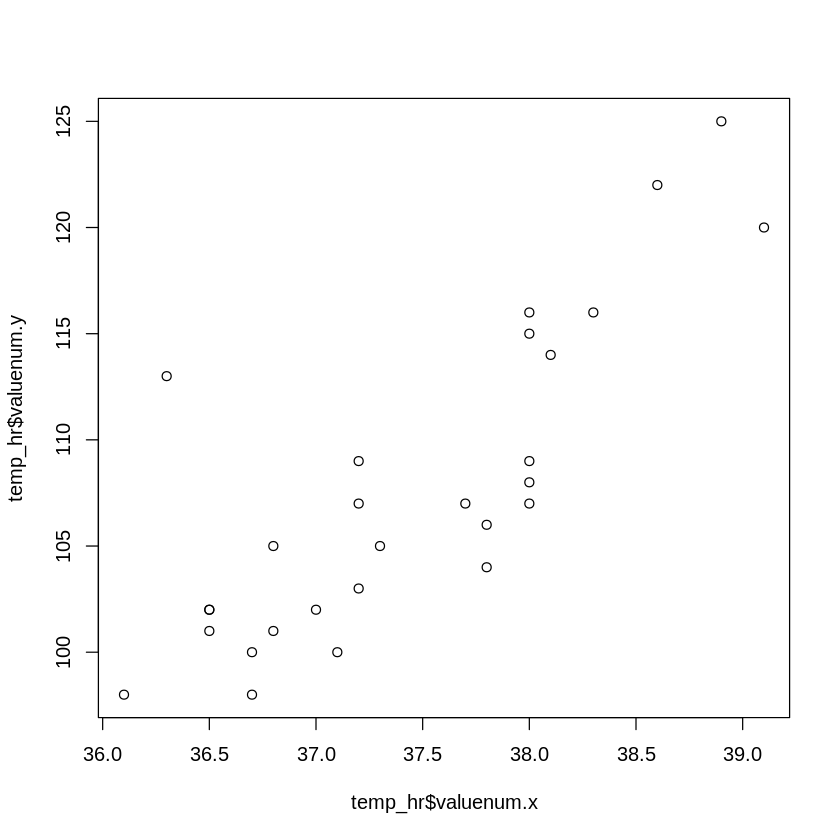

In [9]:
plot(temp_hr$valuenum.x, temp_hr$valuenum.y)

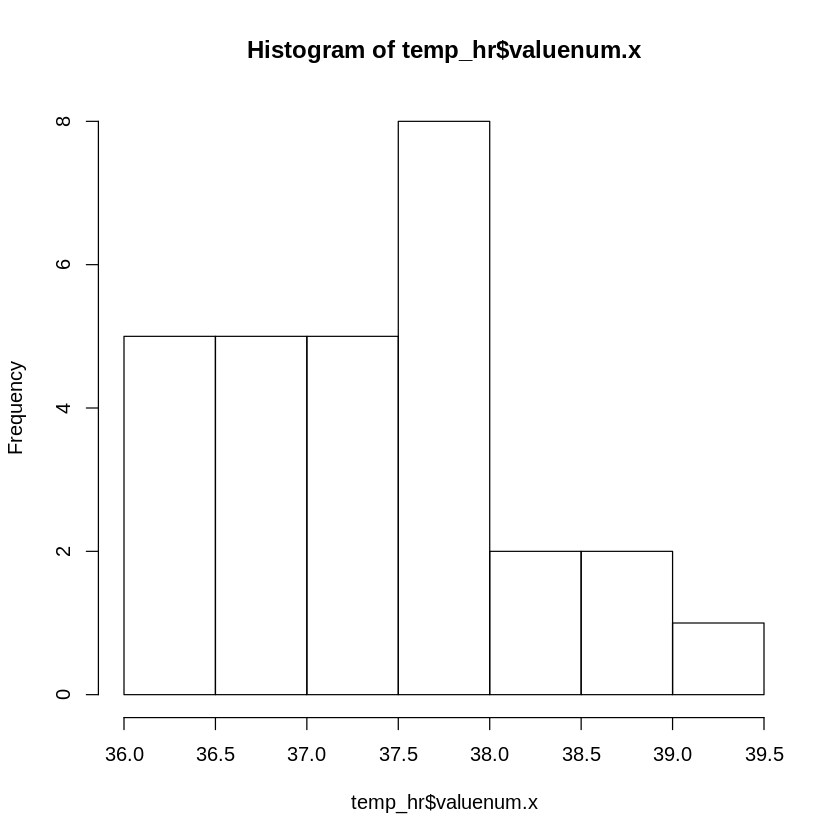

In [10]:
hist(temp_hr$valuenum.x)

In [11]:
shapiro.test(temp_hr$valuenum.x)


	Shapiro-Wilk normality test

data:  temp_hr$valuenum.x
W = 0.95939, p-value = 0.3372


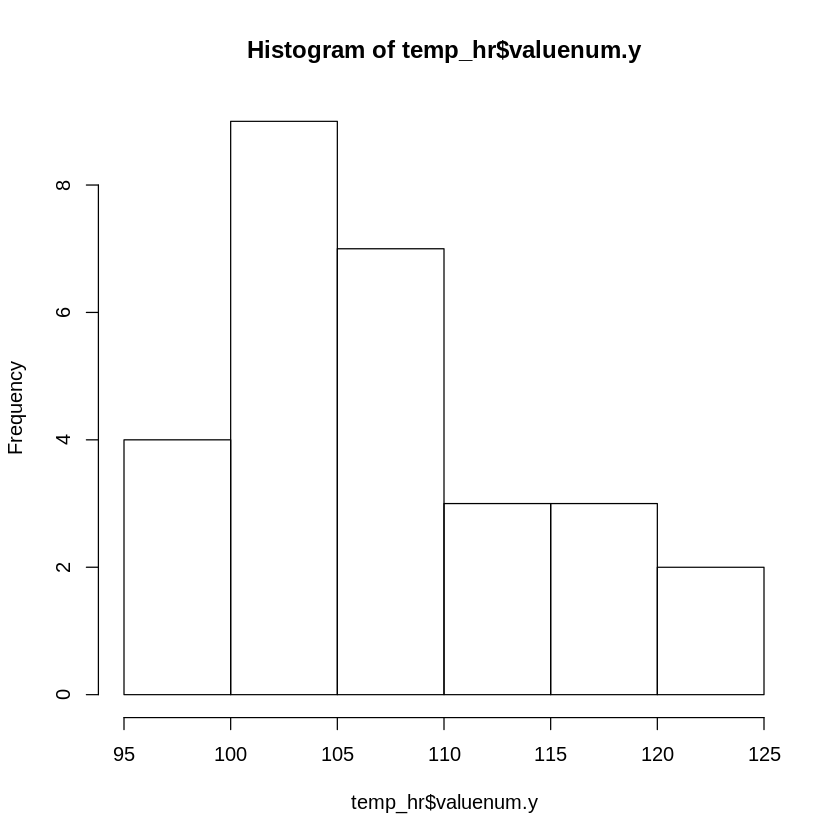

In [12]:
hist(temp_hr$valuenum.y)

In [13]:
shapiro.test(temp_hr$valuenum.y)


	Shapiro-Wilk normality test

data:  temp_hr$valuenum.y
W = 0.9264, p-value = 0.05005


In [14]:
model = lm(formula = temp_hr$valuenum.y ~ temp_hr$valuenum.x)

In [15]:
summary(model)


Call:
lm(formula = temp_hr$valuenum.y ~ temp_hr$valuenum.x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3907 -2.8907  0.0983  1.9287 13.7768 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -171.030     39.217  -4.361 0.000181 ***
temp_hr$valuenum.x    7.445      1.047   7.108 1.51e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.377 on 26 degrees of freedom
Multiple R-squared:  0.6603,	Adjusted R-squared:  0.6472 
F-statistic: 50.53 on 1 and 26 DF,  p-value: 1.506e-07


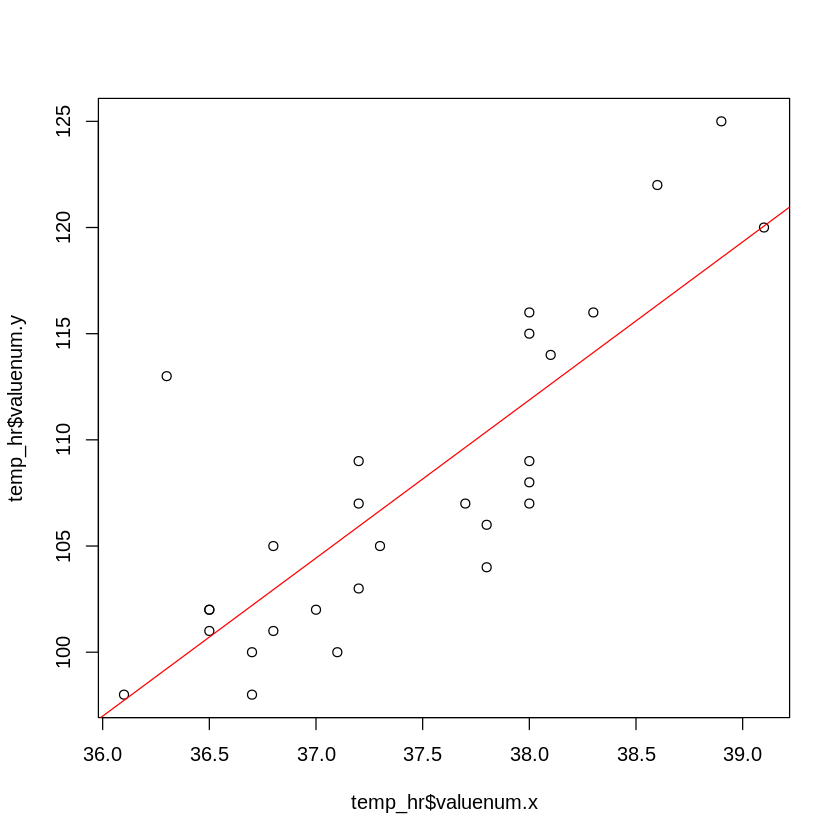

In [16]:
plot(temp_hr$valuenum.x, temp_hr$valuenum.y)
abline(model, col = "red")

https://www.sciencedirect.com/science/article/abs/pii/S0735675719304723

In [98]:
pain_id = 225113
pain = chartevents[chartevents$itemid == pain_id,]
pain$charttime = as.POSIXct(pain$charttime)

In [99]:
pain$date = as.Date(pain$charttime)
hr$date = as.Date(hr$charttime)

In [103]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [107]:
pain_aggregated = aggregate(valuenum ~ date+subject_id, pain, getmode)
head(pain_aggregated)

date,subject_id,valuenum
2130-08-12,40124,0
2169-05-07,40177,1
2169-05-12,40177,0
2151-08-13,40277,0
2193-10-16,40286,1
2186-07-07,40503,0


In [118]:
hr_aggregated = aggregate(valuenum ~ date+subject_id, hr, median)
head(hr_aggregated)

date,subject_id,valuenum
2130-02-04,40124,89.5
2130-02-05,40124,88.0
2130-02-06,40124,88.0
2130-08-12,40124,102.5
2130-08-13,40124,106.0
2130-08-14,40124,101.0


In [119]:
pain_hr = merge(x = pain_aggregated, y = hr_aggregated, by = c("subject_id", "date"))
head(pain_hr)

subject_id,date,valuenum.x,valuenum.y
40124,2130-08-12,0,102.5
40177,2169-05-07,1,67.0
40177,2169-05-12,0,63.0
40277,2151-08-13,0,82.5
40286,2193-10-16,1,113.0
40503,2186-07-07,0,61.0


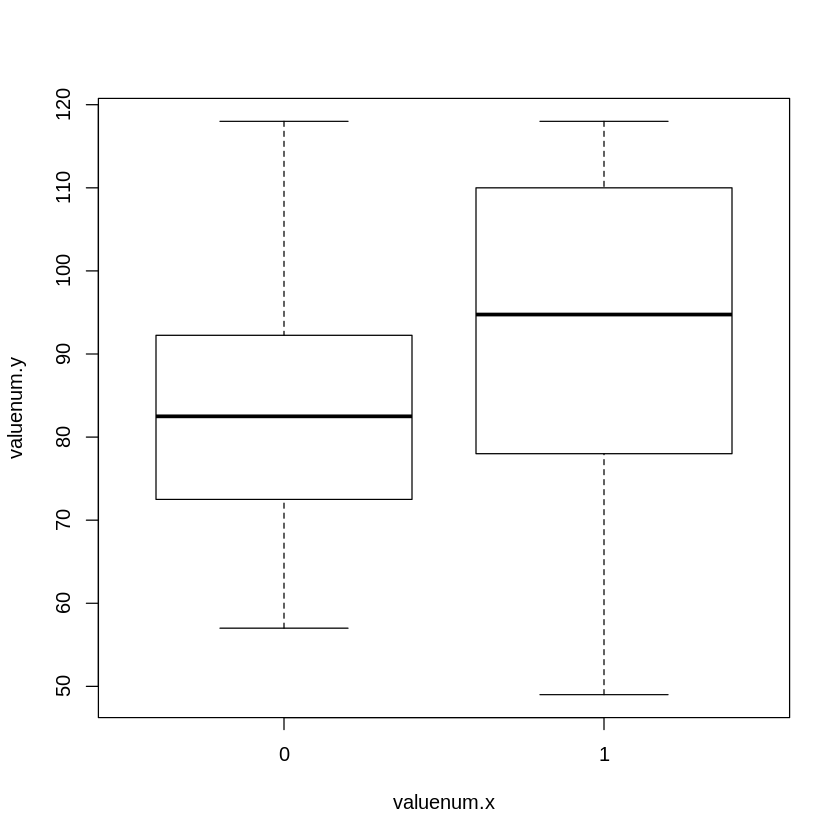

In [120]:
boxplot(formula=valuenum.y~valuenum.x, 
        data=pain_hr 
       )

In [121]:
t.test(formula=valuenum.y~valuenum.x, 
        data=pain_hr)


	Welch Two Sample t-test

data:  valuenum.y by valuenum.x
t = -1.0901, df = 22.908, p-value = 0.287
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -20.561177   6.371736
sample estimates:
mean in group 0 mean in group 1 
       83.86957        90.96429 


In [123]:
patients = read.csv("data/PATIENTS.csv")

In [129]:
head(patients)

row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,,1
9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,,2152-09-12 00:00:00,1
9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1
9486,10026,F,1895-05-17 00:00:00,2195-11-24 00:00:00,,2195-11-24 00:00:00,1


In [150]:
diagnoses = read.csv("data/DIAGNOSES_ICD.csv")

In [222]:
dis_id = 5849
dis = diagnoses[diagnoses$icd9_code == dis_id,]
head(dis)

,row_id,subject_id,hadm_id,seq_num,icd9_code
115,112571,10032,140372,9,5849
118,112574,10033,157235,3,5849
135,112593,10036,189483,4,5849
150,112615,10038,111115,5,5849
207,112686,10045,126949,7,5849
250,112816,10059,122098,11,5849


In [219]:
dis_gender = merge(x = patients[c("subject_id","gender")], y = dis[c("subject_id","icd9_code")], by = c("subject_id"),all.x=TRUE)
dis_gender$ill = ifelse(is.na(dis_gender$icd9_code),0,1)

In [220]:
contingency_table = table(dis_gender$gender, dis_gender$ill)
contingency_table

   
     0  1
  F 43 13
  M 24 32

In [221]:
fisher.test(contingency_table)


	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.0004584
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.819856 10.893306
sample estimates:
odds ratio 
  4.347196 
